In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<AxesSubplot:xlabel='day', ylabel='total_bill'>

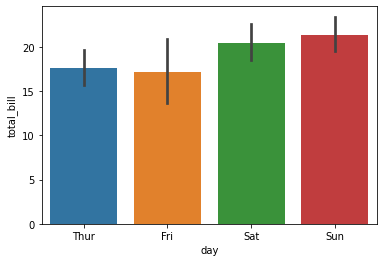

In [8]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95)

In [12]:
tipsFri = tips[tips["day"] == "Fri"] 
tipsFri.head()

,total_bill,tip,sex,smoker,day,time,size,Sun,Sat,Thur,Fri
90,28.97,3.00,Male,Yes,Fri,Dinner,2,Fri,Fri,Fri,Fri
91,22.49,3.50,Male,No,Fri,Dinner,2,Fri,Fri,Fri,Fri
92,5.75,1.00,Female,Yes,Fri,Dinner,2,Fri,Fri,Fri,Fri
93,16.32,4.30,Female,Yes,Fri,Dinner,2,Fri,Fri,Fri,Fri
94,22.75,3.25,Female,No,Fri,Dinner,2,Fri,Fri,Fri,Fri


In [15]:
xbar =tipsFri.total_bill.mean()
xbar

17.151578947368417

In [16]:
tipsFri.shape

(19, 11)

In [17]:
sem = tipsFri.total_bill.sem()
sem

1.904760773479416

In [18]:
tipsFri.total_bill.std() / np.sqrt(len(tipsFri))

1.904760773479416

In [19]:
moe = 1.96 * sem
moe

3.7333311160196554

In [20]:
upper = xbar + moe
upper

20.884910063388073

In [21]:
lower = xbar - moe
lower

13.418247831348761

In [22]:
stats.norm.interval(0.95, loc=xbar, scale=sem)

(13.418316432184106, 20.88484146255273)

__-with SciPy library__

In [24]:
stats.norm.interval(0.95, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())

(13.418316432184106, 20.88484146255273)

__-with using "t" distribution__

In [25]:
stats.t.interval(0.95, df=len(tipsFri)-1, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())

(13.149825056979093, 21.15333283775774)

__--Another example: For Sunday__

In [26]:
tipsSun = tips[tips["day"] == "Sun"]
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size,Sun,Sat,Thur,Fri
0,16.99,1.01,Female,No,Sun,Dinner,2,Fri,Fri,Fri,Fri
1,10.34,1.66,Male,No,Sun,Dinner,3,Fri,Fri,Fri,Fri
2,21.01,3.50,Male,No,Sun,Dinner,3,Fri,Fri,Fri,Fri
3,23.68,3.31,Male,No,Sun,Dinner,2,Fri,Fri,Fri,Fri
4,24.59,3.61,Female,No,Sun,Dinner,4,Fri,Fri,Fri,Fri


In [27]:
len(tipsSun)

76

In [28]:
stats.t.interval(0.95, df=len(tipsSun)-1, loc=tipsSun.total_bill.mean(), scale=tipsSun.total_bill.sem())

(19.391773706521036, 23.42822629347897)

__--find moe__

In [29]:
xbar = tipsSun.total_bill.mean()
xbar

21.410000000000004

In [30]:
std = tipsSun.total_bill.std()
std

8.832121828869889

In [31]:
sem = std / np.sqrt(len(tipsSun))
sem

1.0131138555021968

In [36]:
stats.norm.ppf(0.975) # z score for %95--> z/2

1.959963984540054

In [32]:
moe = 1.96 * sem
moe

1.9857031567843058

__-moe for t distribution__

In [33]:
stats.t.ppf(0.975, 75)

1.9921021536898653

In [34]:
stats.t.ppf(0.025, 75)

-1.9921021536898658

In [35]:
moe = 1.992 * sem
moe

2.018122800160376